In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [33]:
df = pd.read_csv('imdb.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['review'])

In [7]:
# Convert the text data to sequences
x_train = tokenizer.texts_to_sequences(train_df['review'])
x_test = tokenizer.texts_to_sequences(test_df['review'])

In [8]:
max_len = 100
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [9]:
y_train = train_df['sentiment'].replace({'positive': 1, 'negative': 0})
y_test = test_df['sentiment'].replace({'positive': 1, 'negative': 0})

In [19]:
model = Sequential()
model.add(Embedding(max_words, 16, input_length=max_len))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [20]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Train the model
batch_size = 128
epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/10
282/282 [==============================] - 7s 21ms/step - loss: 0.4361 - accuracy: 0.7810 - val_loss: 0.3203 - val_accuracy: 0.8587
Epoch 2/10
282/282 [==============================] - 6s 21ms/step - loss: 0.2047 - accuracy: 0.9213 - val_loss: 0.3809 - val_accuracy: 0.8445
Epoch 3/10
282/282 [==============================] - 5s 18ms/step - loss: 0.0680 - accuracy: 0.9780 - val_loss: 0.5745 - val_accuracy: 0.8335
Epoch 4/10
282/282 [==============================] - 6s 23ms/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 0.8832 - val_accuracy: 0.8382
Epoch 5/10
282/282 [==============================] - 5s 18ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 1.0047 - val_accuracy: 0.8330
Epoch 6/10
282/282 [==============================] - 7s 23ms/step - loss: 0.0161 - accuracy: 0.9943 - val_loss: 1.0482 - val_accuracy: 0.8242
Epoch 7/10
282/282 [==============================] - 5s 19ms/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 1.1430 - val_accuracy: 0.8248

In [22]:
# Make predictions on test data
predictions = model.predict(x_test)
predicted_labels = np.round(predictions).flatten()

313/313 [==============================] - 1s 3ms/step


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
classification_rep = classification_report(y_test, predicted_labels)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4961
           1       0.83      0.83      0.83      5039

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [24]:
# Create the confusion matrix
confusion_mtx = confusion_matrix(y_test, predicted_labels)
print('Confusion Matrix:')
print(confusion_mtx)

Confusion Matrix:
[[4081  880]
 [ 878 4161]]


In [25]:
import seaborn as sns


<Axes: >

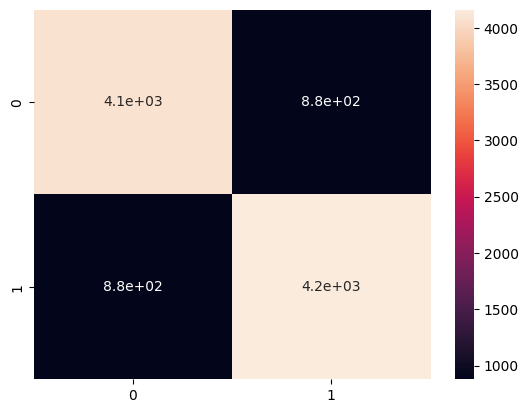

In [26]:
sns.heatmap(confusion_mtx, annot = True)

In [32]:
print(classification_report(y_test, predicted_labels, target_names=class_names))


              precision    recall  f1-score   support

    Positive       0.82      0.82      0.82      4961
    Negative       0.83      0.83      0.83      5039

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

